# 데커레이터(@)

ref-1) [최규빈 교수님 깃허브](https://miruetoto.github.io/yechan/%ED%8C%8C%EC%9D%B4%EC%8D%AC/2022/02/03/(%EB%85%B8%ED%8A%B8)-%EB%8D%B0%EC%BD%94%EB%A0%88%EC%9D%B4%ED%84%B0-%ED%8C%8C%EC%9D%B4%EC%8D%AC.html)

ref-2) [코딩도장 참고 사이트](https://dojang.io/mod/page/view.php?id=2427)

- 데코레이터는 함수를 장식한다고 할 수 있는데, 도대체 어디에 사용하는 것일까? 데코레이터는 함수를 수정하지 않은 상태에서 추가 기능을 구현할 때 사용한다. 예를 들어서 함수의 시작과 끝을 출력하고 싶다면 다음과 같이 함수 시작, 끝 부분에 print를 넣어주어야 한다.

In [31]:
def hello():
    print('hello 함수 시작')
    print('hello')
    print('hello 함수 끝')
    
def world():
    print('world 함수 시작')
    print('world')
    print('world 함수 끝')

In [32]:
hello()

hello 함수 시작
hello
hello 함수 끝


In [33]:
world()

world 함수 시작
world
world 함수 끝


- 만약 다른 함수도 시작과 끝을 출력하고 싶다면 함수를 만들 때마다 print를 넣어햐 한다. 따라서 함수가 많아지면 매우 번거로워질 수 있다. 이런 경우에는 데코레이터를 활용하면 편리하다. 
- 다음은 함수의 시작과 끝을 출력하는 데코레이터이다.

In [30]:
def trace(func):                             # 호출할 함수를 매개변수로 받음
    def wrapper():                           # 호출할 함수를 감싸는 함수
        print(func.__name__, '함수 시작')    # __name__으로 함수 이름 출력
        func()                               # 매개변수로 받은 함수를 호출
        print(func.__name__, '함수 끝')
    return wrapper                           # wrapper 함수 반환
 
def hello():
    print('hello')
    
def world():
    print('world')

trace_hello = trace(hello)    # 데코레이터에 호출할 함수를 넣음
trace_hello()                 # 반환된 함수를 호출
trace_world = trace(world)    # 데코레이터에 호출할 함수를 넣음
trace_world()                 # 반환된 함수를 호출

hello 함수 시작
hello
hello 함수 끝
world 함수 시작
world
world 함수 끝


In [34]:
type(trace_hello)

function

```python
def trace(func):                             
        print(func.__name__, '함수 시작')    
        func()                               
        print(func.__name__, '함수 끝')
```
- 이렇게 해줘도 된다고 생각했는데 하면 안 되는 이유가 데코레이터의 사용이유 자체가 함수를 장식하는 것, 함수를 수정하지 않은 상태에서 추가 기능을 구현한 함수를 만들고 싶은 것이다. 
- 그런데 이렇게 수행해주면 trace(hello)수행시에 반환되는 객체는 바로 위 셀처럼 function이 아니게 됨
- 따라서 감싸는 함수를 만들어준다음에 return으로 함수 객체를 내보내줘야함

- 먼저 데코레이터 trace는 호출할 함수를 매개변수로 받는다.
- 즉 함수 안에서 함수를 만들고 반환하는 클로저이다.

- 데코레이터를 사용할 때는 trace에 호출할 함수 hello 또는 world를 넣습니다. 그 다음에 데코레이터에서 반환된 함수를 호출한다. 이렇게하면 데코레이터에서 반환된 함수를 호출한다. 이렇게 하면 데코레이터에 인수로 넣은 함수를 호출하고 시작화 끝을 출력한다.

- 물론 trace에 다른 함수를 넣은 뒤 반환된 함수를 호출하면 해당 함수의 시작과 끝을 출력할 수 있다.

---

- @로 데코레이터 사용하기
  - 이제 @을 사용하여 좀 더 간편하게 데코레이터를 사용해보자
  - 다음과 같이 호출할 함수 위에 @데코레이터 형식으로 지정한다.
  ```python
  @데코레이터
  def 함수이름():
  코드
  ```

In [37]:
def trace(func):                             # 호출할 함수를 매개변수로 받음
    def wrapper():
        print(func.__name__, '함수 시작')    # __name__으로 함수 이름 출력
        func()                               # 매개변수로 받은 함수를 호출
        print(func.__name__, '함수 끝')
    return wrapper                           # wrapper 함수 반환
 
@trace    # @데코레이터
def hello():
    print('hello')
    
@trace    # @데코레이터
def world():
    print('world')

hello()    # 함수를 그대로 호출
world()    # 함수를 그대로 호출

hello 함수 시작
hello
hello 함수 끝
world 함수 시작
world
world 함수 끝


- hello와 world 함수 위에 @trace를 붙인 뒤에 hello와 world 함수를 그대로 호출하면 끝이다

- 물론 다른 함수 위에 @trace를 붙인 뒤 함수를 호출하면 해당 함수의 시작과 끝을 출력할 수 있다.

- 이 데코레이터를 그림으로 표현하면 다음과 같은 모양이 될 수 있다.

- 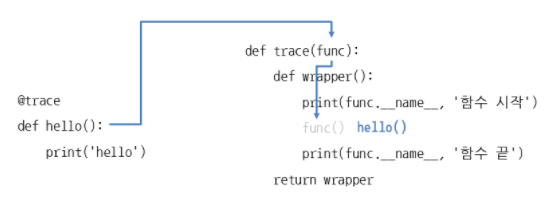
- ref) [파이썬 코딩 도장](https://dojang.io/mod/page/view.php?id=2427)

- 이렇게 데코레이터는 함수를 감싸는 형태로 구성되어 있다. 따라서 데코레이터는 기존 함수를 수정하지 않으면서 추가 기능을 구현할 때 사용한다.

---

- 데코레이터 여러 개 지정하기
  - 함수에는 데코레이터를 여러 개 지정할 수 있다. 다음과 같이 함수 위에 데코레이터를 여러 줄로 지정해준다. 이때 데코레이터가 실행되는 순서는 위에서 아래 순이다.
  ```python
  @데코레이터1
  @데코레이터2
  def 함수이름():
    코드
  ```

In [62]:
def decorator1(func):
    def wrapper():
        print('decorator1')
        func()
    return wrapper
 
def decorator2(func):
    def wrapper():
        print('decorator2')
        func()
    return wrapper
 
# 데코레이터를 여러 개 지정
@decorator1
@decorator2
def hello():
    print('hello')

hello()
# 데코레이터가 두개 얹어져있을 땐,
# 아래에서부터 위로 적용해가며 올라간다고 생각하면 될 것같다

decorator1
decorator2
hello


---

ref) [최규빈 교수님 깃허브](github.com/guebin)

- 아래와 같은 함수를 정의해야 하는 상황을 생각하자. 

```python
# step1
def deco(f):
    ??

# step2 
def f(??):
    ??

# step3
f=deco(f)
```

- 이럴때는 아래와 같이 편리하게 정의할 수 있다. 

```python
# step1 
def deco(f):
    ??

# step2 
@deco
def f(?):
    ??
```

### 예제1: 함수를 새롭게 정의할때 `중요한 함수는 따로 list로 만들어 저장`해보자. 

`-` `중요한 함수는 따로 list로 만들어 저장` 하는 함수를 구현하자. (이게 deco함수이다)

In [63]:
lst=[] 
def m(f):
    lst.append(f)
    return f 

`-` 

In [64]:
@m
def myadd(x,y):
    return x+y 

In [65]:
myadd(1,2)

3

In [66]:
lst

[<function __main__.myadd(x, y)>]

In [67]:
@m
def mymul(x,y):
    return x*y 

In [68]:
lst

[<function __main__.myadd(x, y)>, <function __main__.mymul(x, y)>]

In [69]:
@m
def _mysq(x):
    return x**2

In [71]:
lst

[<function __main__.myadd(x, y)>,
 <function __main__.mymul(x, y)>,
 <function __main__._mysq(x)>]

In [75]:
lst[0](1,2)
# 이런 식으로 활용?,,,

3